<a href="https://colab.research.google.com/github/dinasquare/PC_Parts_Classifier/blob/main/PC_Parts_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PC PARTS CLASSIFIER
*Agenda: To classify 14 different classes of images of different parts of a pc

##About Dataset
© https://www.kaggle.com/datasets/asaniczka/pc-parts-images-dataset-classification?resource=download
The images are in the ImageNet structure, with each class having its own folder containing the respective images. The images have a resolution of 256x256 pixels.

Dataset Details:
Total number of classes: 14
Total number of images: 3279
Resolution: 256x256 pixels
Image format: JPG
If you find this dataset useful or interesting, please don't forget to show your support by Upvoting! 🙌👍

##Data Collection Methodology:
To create this dataset,

I searched for each PC part on Google Images and extracted the image links.
I then downloaded the full-size images from the original source and converted them to JPG format with a resolution of 256 pixels.
During the process, most images were downscaled, with only a very few being upscaled.
Finally, I manually went over all the images and deleted any that didn't fit well for image classification.
Potential Task Ideas:
Train an image classification model using popular architectures like ViT, ResNet, or EfficientNet.
Perform transfer learning on this dataset using pre-trained models.
Explore different data augmentation techniques to enhance model performance.
Fine-tune existing models to improve classification accuracy.
Compare the performance of different models on this dataset.
Use the dataset as a benchmark for evaluating new image classification techniques.
Class Naming Convention:
All files are named in ImageNet style.

Kingdom
├── class_1
│   ├── 1.jpg
│   └── 2.jpg
├── class_2
│   ├── 1.jpg
│   └── 2.jpg
└── class_3
    ├── 1.jpg
    └── 2.jpg

In [ ]:
import datetime
print(f"Last run {datetime.datetime.now()}")
# f=>f string VALUE KO CURLY BRACES MEIN DALDO BAAKI SAB " " k beech mein

Last run 2024-05-13 16:06:53.267915


UNZIPPING THE ZIP FILE OF THE DATASET

In [ ]:
import zipfile

zipo = zipfile.ZipFile("/content/archive (5).zip" , 'r')
zipo.extractall()
zipo.close()

Checking how many images are there in each folder

In [ ]:
import os

for dirpath,dirnames, filenames in os.walk("/content/pc_parts"):
  print(f"There are{len(dirnames)} files in path {dirpath}")

There are14 files in path /content/pc_parts
There are0 files in path /content/pc_parts/headset
There are0 files in path /content/pc_parts/monitor
There are0 files in path /content/pc_parts/cables
There are0 files in path /content/pc_parts/keyboard
There are0 files in path /content/pc_parts/microphone
There are0 files in path /content/pc_parts/hdd
There are0 files in path /content/pc_parts/webcam
There are0 files in path /content/pc_parts/motherboard
There are0 files in path /content/pc_parts/case
There are0 files in path /content/pc_parts/mouse
There are0 files in path /content/pc_parts/cpu
There are0 files in path /content/pc_parts/gpu
There are0 files in path /content/pc_parts/ram
There are0 files in path /content/pc_parts/speakers


EDA

In [ ]:
import cv2 #open cv
from google.colab.patches import cv2_imshow

In [ ]:
img = cv2.imread("/content/pc_parts/gpu/109.jpg")

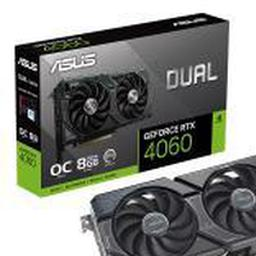

In [ ]:
cv2_imshow(img)

In [ ]:
train_dir="/content/pc_parts"
img_size =(255, 255)

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:

train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                 image_size = img_size,
                                                                 label_mode="categorical",
                                                                 batch_size=32,
                                                                 seed=42)


Found 3279 files belonging to 14 classes.


##DATA AUGMENTATION
We have a set of images that are good for laboratory conditions, i.e, perfect conditions. But irl we need images that are not perfect like lab so we apply data augmentation on it which random;y flips/rotates/zooms/shift by height or width/ rescale for the natural environment

In [ ]:
data_aug = tf.keras.Sequential([
    layers.RandomFlip("vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    layers.Rescaling(1./255)
])

In [ ]:
class_name=train_data.class_names
class_name

['cables',
 'case',
 'cpu',
 'gpu',
 'hdd',
 'headset',
 'keyboard',
 'microphone',
 'monitor',
 'motherboard',
 'mouse',
 'ram',
 'speakers',
 'webcam']

In [ ]:
# tf.random.set_seed(42)

# # creation of a model
# base_model = tf.keras.models.Sequential([
#     layers.Conv2D(32, 3 ,activation='relu'),
#     layers.Conv2D(32, 3 ,activation='relu'),
#     layers.MaxPool2D(),
#     layers.Conv2D(32, 3 ,activation='relu'),
#     layers.Conv2D(32, 3 ,activation='relu'),
#     layers.MaxPool2D(),
#     layers.Flatten(),
#     layers.Dense(256, activation='relu'),
#     layers.Dense(128, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(14, activation='softmax')
# ])

# #compile
# base_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
#                   optimizer=tf.keras.optimizers.Adam(),
#                   metrics=['accuracy'])

# #fit
# base_model.fit(train_data,
#               epochs=15,
#               steps_per_epoch=len(train_data),
#                batch_size=32)

In [ ]:
+tf.random.set_seed(42)

# 1. Create Mode
input_tensor=tf.keras.Input(shape=(255,255,3))
model_1=tf.keras.applications.ConvNeXtXLarge(include_top=False,
    weights='imagenet',
    input_tensor=input_tensor,
    # input_shape=(224, 224, 3),
    pooling='max',
    # classes=14,
    classifier_activation='softmax')

model__1 = tf.keras.Sequential([model_1,
                                layers.Dense(14, activation='softmax')])
# 2. Compile Model
model__1.compile(loss='CategoricalCrossentropy',
                optimizer = 'Adam',
                metrics=['accuracy' , 'mae'])

#3. Fit model
model__1.fit(train_data,
            epochs=10,
            steps_per_epoch=len(train_data),
            batch_size=15)

Epoch 1/10


ResourceExhaustedError: Graph execution error:

Detected at node sequential_3/convnext_xlarge/convnext_xlarge_stage_0_block_0_pointwise_conv_1/BiasAdd-0-TransposeNHWCToNCHW-LayoutOptimizer defined at (most recent call last):
<stack traces unavailable>
OOM when allocating tensor with shape[32,1024,63,63] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node sequential_3/convnext_xlarge/convnext_xlarge_stage_0_block_0_pointwise_conv_1/BiasAdd-0-TransposeNHWCToNCHW-LayoutOptimizer}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_162076]

In [ ]:
# tf.random.set_seed(42)

# # 1. Create Mode
# input_tensor=tf.keras.Input(shape=(255,255,3))
# model_2=tf.keras.applications.ResNet50V2(include_top=False,
#     weights='imagenet',
#     input_tensor=input_tensor,
#     # input_shape=(224, 224, 3),
#     pooling='max',
#     # classes=14,
#     classifier_activation='softmax')

# model__2 = tf.keras.Sequential([model_1,
#                                 layers.Dense(14, activation='softmax')])
# # 2. Compile Model
# model__2.compile(loss='CategoricalCrossentropy',
#                 optimizer = 'Adam',
#                 metrics=['accuracy' , 'mae'])

# #3. Fit model
# model__2.fit(train_data,
#             epochs=5,
#             steps_per_epoch=len(train_data),
#             batch_size=32)

In [ ]:
# tf.keras.load_model(<path>)

In [ ]:
image=tf.io.read_file("/content/mouse.jpeg")
image=tf.image.decode_image(image,channels=3)
image=tf.image.resize(image,(255,255))
# image=tf.image.resize(image,(224,224))
image=image/255.

plt.imshow(image)
plt.axis(True)

In [ ]:
prediction = model__1.predict(tf.expand_dims(image, axis=0))
prediction

In [ ]:
prediction.argmax()

In [ ]:
class_name[prediction.argmax()]